In this section we will be investigating the results from the [spark job](./aws_emr_notebook.ipynb) that we ran.
We will begin by investigating the servers count from our old 2008 ARC file and a 2017 WARC file (which we process by running the [spark_job](./aws_emr_notebook.ipynb) on a link to a new bucket such as the following: 

s3://commoncrawl/crawl-data/CC-MAIN-2017-13/segments/1490218186353.38/warc/CC-MAIN-20170322212946-00000-ip-10-233-31-227.ec2.internal.warc.gz

More information about what this link means can be found on the [getting started](https://commoncrawl.org/the-data/get-started/) page. 

Note that this notebook is meant to be a continuation the previous [notebook](aws_emr_notebook,ipynb), so if you have not looked at it please do so!

First we start off by defining the dataframes we are interested in. In this case we will look at a dataframe for which servers were used (in 2008), and a similar dataframe but for 2017 data.

In [84]:
old_input_file = "s3://emr-arc-notebook/test_arc_output"
new_input_file = "s3://emr-arc-notebook/test_warc_output"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Load up the dataframes using Spark

In [85]:
old_df = spark.read.parquet(old_input_file)
new_df = spark.read.parquet(new_input_file)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We will define a function to process a dataframe. We will simply take the value of every row and normalize it by taking only the server name, without the versioning (so Apache/2.2.X (Fedora) will be the same as Apache/2.2.8 (Unix)). We will store the frequency of these normalized values.

In [87]:
def process_parquet(some_df):
    some_map = {}
    for row in some_df.collect():
        server_tokens = row['key'].split("/")
        normalized_name = server_tokens[0]
        add_value = int(row['val'])
        if normalized_name in some_map:
            some_map[normalized_name] += add_value
        else:
            some_map[normalized_name] = add_value
    return some_map

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We will run this function on both of our dataframes (so we can have the frequency of servers for both 2008 and 2017).

In [88]:
old_normalized_server_frequency = process_parquet(old_df)
new_normalized_server_frequency = process_parquet(new_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We will take the top 10 most popular servers to investigate even further.

In [89]:
cropped_old_servers = dict(sorted(old_normalized_server_frequency.items(), key=lambda item: item[1], reverse=True)[:10])
cropped_new_servers = dict(sorted(new_normalized_server_frequency.items(), key=lambda item: item[1], reverse=True)[:10])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
sc.install_pypi_package("matplotlib", "https://pypi.org/simple") #Install matplotlib from given PyPI repository

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1189, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



In [91]:
print(cropped_old_servers)
print(cropped_new_servers)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'Apache': 15329, 'Microsoft-IIS': 4248, 'nginx': 642, '(no server in HTTP header)': 365, 'Apache-Coyote': 154, 'lighttpd': 138, 'IBM_HTTP_Server': 72, 'Netscape-Enterprise': 68, 'Resin': 53, 'Zope': 51}
{'Apache': 15582, 'nginx': 12758, 'Microsoft-IIS': 4125, 'cloudflare-nginx': 3538, '(no server in HTTP header)': 3490, 'GSE': 2562, 'Apache-Coyote': 535, 'LiteSpeed': 511, 'openresty': 203, 'ATS': 119}

In [92]:
import matplotlib.pyplot as plt

plt_list = [0]*2
fig, (plt_list[0], plt_list[1]) = plt.subplots(1, 2)
fig.suptitle('Server usage')
fig.set_figheight(15)
fig.set_figwidth(15)

plt_list[0].bar(cropped_old_servers.keys(), cropped_old_servers.values())
plt_list[0].set_xlabel('Server names',rotation=0)
plt_list[0].set_ylabel('Frequency',rotation=90)
plt_list[0].set_xticklabels(cropped_old_servers.keys(), rotation = 90)
plt_list[0].title.set_text("Server frequency from 2008")


plt_list[1].bar(cropped_new_servers.keys(), cropped_new_servers.values())
plt_list[1].set_xlabel('Server names',rotation=0)
plt_list[1].set_ylabel('Frequency',rotation=90)
plt_list[1].set_xticklabels( cropped_new_servers.keys(), rotation = 90)
plt_list[1].title.set_text("Server frequency from 2017")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We will use the magic command `%matplot plt` to plot our server frequency data! More information about magic commands, and general usage of Python libraries can be found on the [AWS EMR Docs](https://aws.amazon.com/de/blogs/big-data/install-python-libraries-on-a-running-cluster-with-emr-notebooks/)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

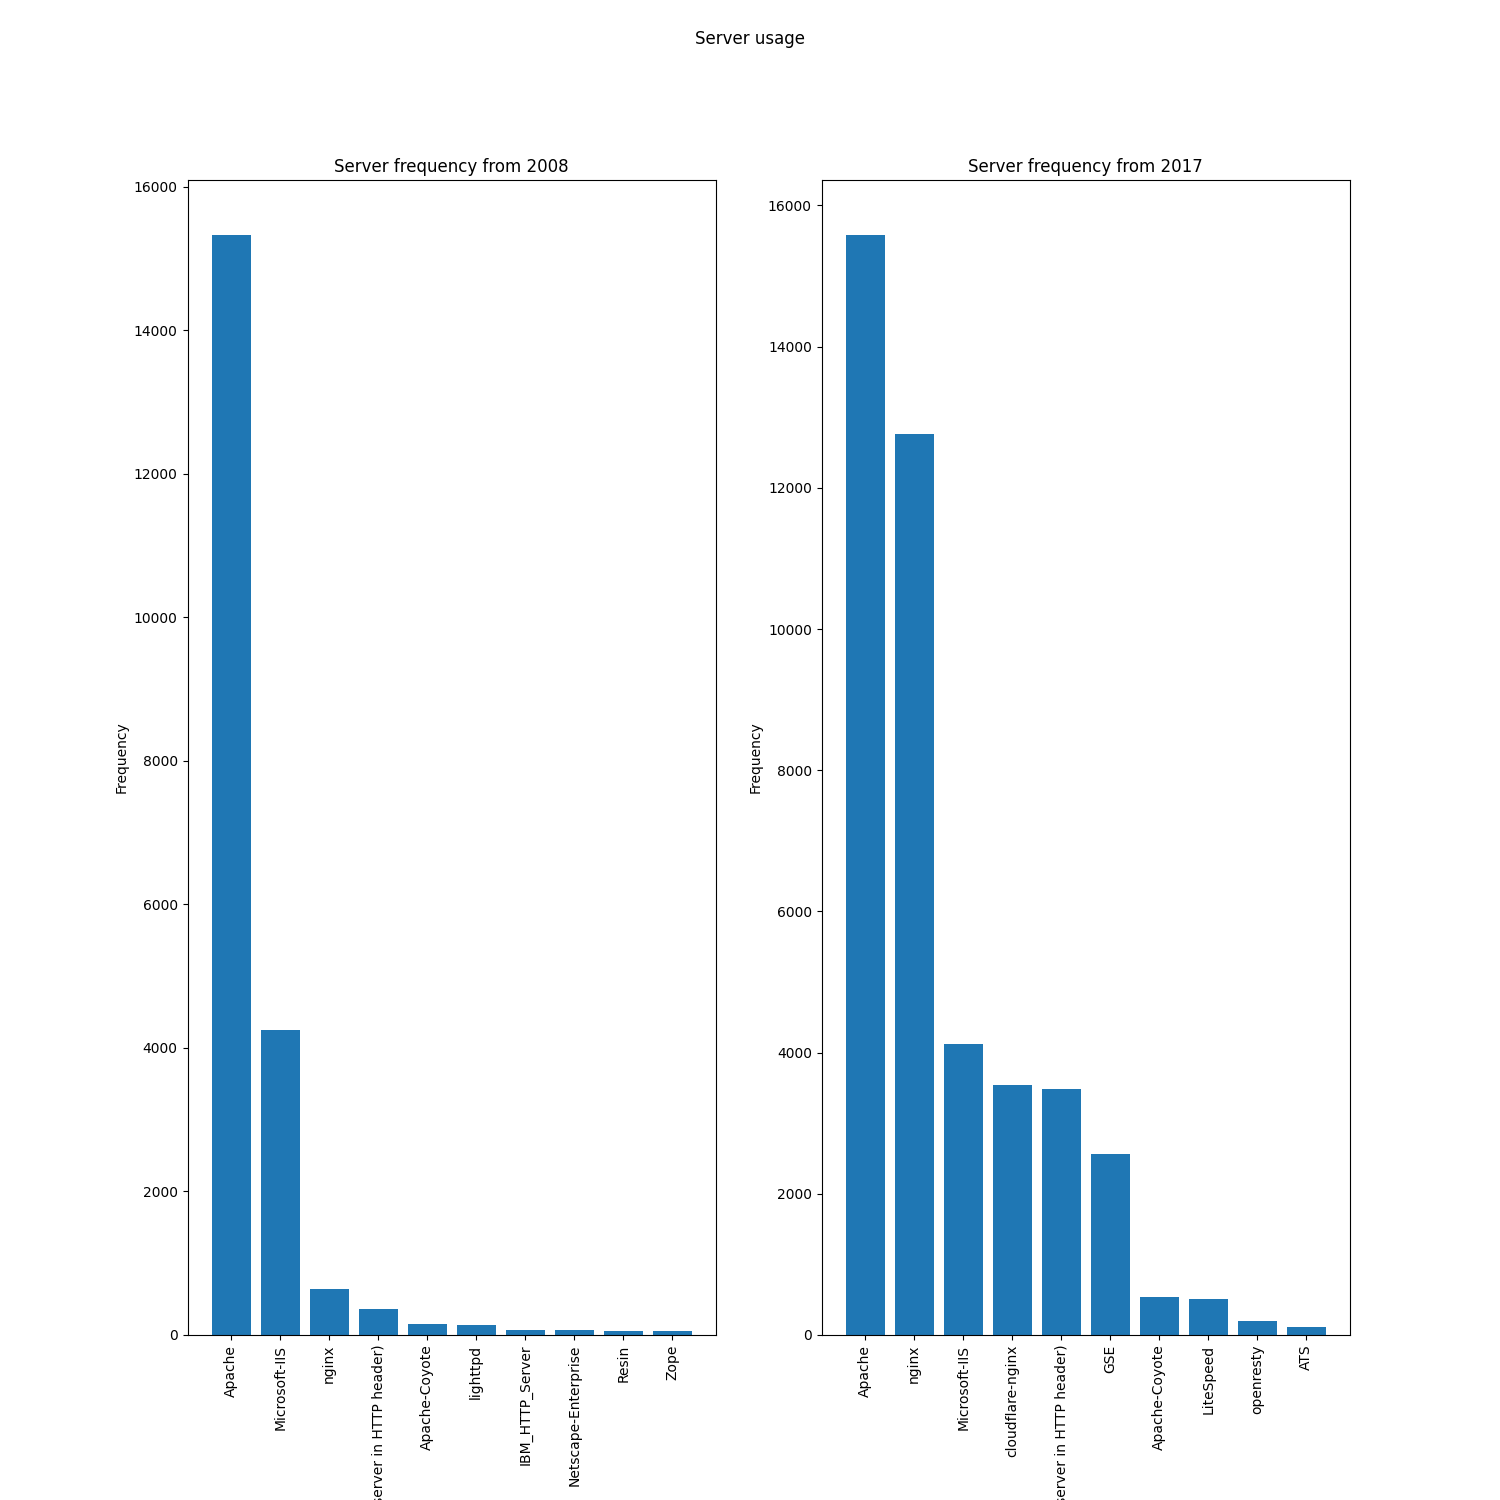

In [93]:
%matplot plt

It is interesting to see that Apache is still the most popular after roughly a decade, and the popularity of nginx. This is of course a very simple analysis on a very simple dataset. We encourage you to explore this on your own, whether it be with your own dataset (which you can learn to create [here](./aws_emr_notebook.ipynb)) or with your own analysis!